# Data :

 -   The Brfss 2013 data comes from an observational study ,The data is collected by contacting individual households through telephonic interviews and recording the information about their health and habits.

    
    
    
    
 - We can rule out the possibility that it is not an Experimental study since it does not involve segregation of sample into multiple groups and subjecting them to conditions which are suspected to give varied outcomes.

    
    
    
    
 - Since it is not an Experimental study we can only establish a correlation or association between any given variables but not causation.

    
    
    
    
 - We can not generalize the results of this study to the Population since we cannot infer any causal relations within the dataset.


- <b>Random Assignment<b> :
    
   <i>No,There is no random assignment used in this Data because it is just an Observational Study not an Experimental study and only Experimental study has random assignment.

# Research Questions :


##### First Research question :

 - Common conception is that people suffering with obesity may also develop diabetes eventually due to unhealthy dietary practices,I wanted to test this conception and see how it stands out given the data.For this I have taken 3 variables (One categorical and two numerical variables)diabete3,weight2,height3.[SOURCE](https://www.medicinenet.com/script/main/art.asp?articlekey=39840)
 
 

##### Second Research Question :

 - For the second research question I am have taken up variables from main survey of Medicare access and main survey of genhlth.To see any relation between Medicare access and Overall health of the participants.We like to think that the access to medicare can positively affect the Overall health of the participants.
 
 
 
 ###### Third Research Question :
 
 - For this third Research question I have selected the variables like Alcohol Consumption , Ever Diagnosed with a Heart attack and Income Level , These together give us Two Numerical Variables and One categorical variable.I have selected these three variables to try to understand the Alcohol consumption levels of all the Income classes of the society and How many of them had heart attacks.

In [1]:
library(dplyr)
library(ggplot2) 
library(tidyverse)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.3     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Confl

In [2]:
# loading the brfss data

load("C:/Users/SOMUNAIDU/Downloads/brfss2013.Rdata")


# Research Question 1

In [3]:
# Changing the variable  name to convenience
brfss <- brfss2013

# Select the columns weight2,height3,diabete3
diabetes <- brfss %>% select(weight2,height3,diabete3)


# Filter the Null values in all the columns / variables
diabetes <- diabetes %>% filter(!is.na(weight2),!is.na(height3),!is.na(diabete3))

# Convert the data types of columns height 3 and weight2 into numeric
diabetes <- diabetes %>% mutate(weight2=as.numeric(weight2),height3=as.numeric(height3))

# Some entries in weight2 column has blank values , subset() function removes those values and give entries with only numbers
diabetes <- subset(diabetes,weight2!="")

In [4]:
# Extract required string from the entire string like "YES" /"NO"

diabetes <- diabetes %>% mutate(diabete3=str_extract(diabete3,"^(Yes|No)"))

In [5]:
# Create a new varibale BMI (Body Mass Index) with the formula BMI = (weight)/height^2 where weight is in kgs and height in metres 
diabetes <- diabetes %>% mutate(BMI=(diabetes$weight2*(0.453592)/(((diabetes$height3/100)*(0.3048) **2))))


# Create a new variable Obese with two values "Yes" if BMI > 30 and "NO" if BMI < 30
diabetes <- diabetes %>% mutate(Obesity=ifelse(BMI>30,"Yes","No"))

In [6]:
# Using group by function to summarise the number of people with categories diabete3 and Obesity

diabetes <- diabetes %>% group_by(diabete3,Obesity ) %>% summarise(counts=n())

`summarise()` regrouping output by 'diabete3' (override with `.groups` argument)


In [7]:
data_viz <- diabetes 

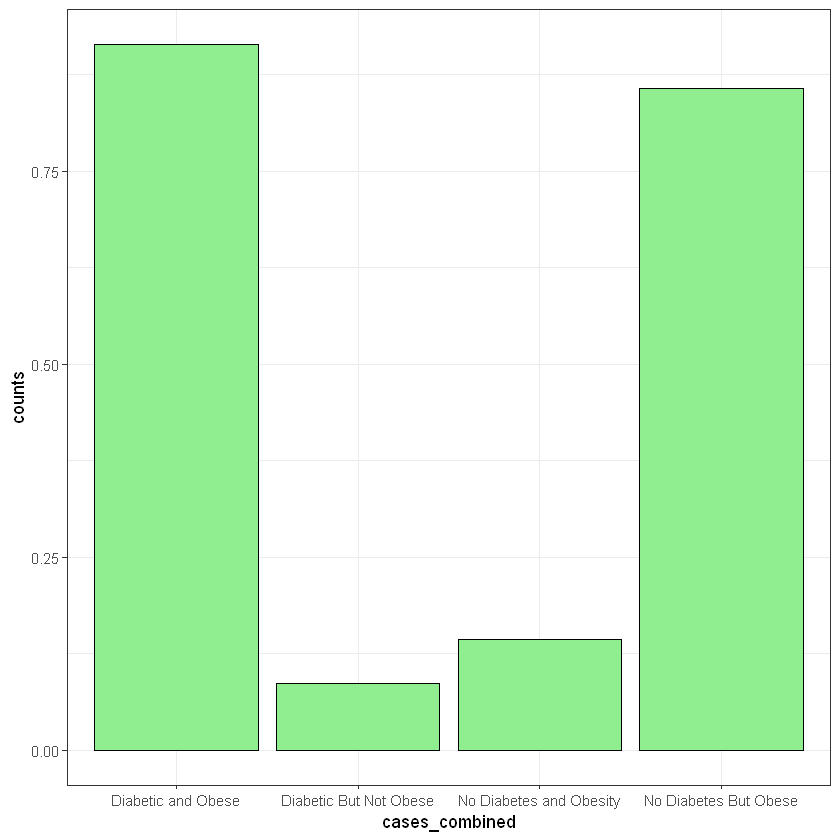

In [8]:
# Normalising the counts column by the formula counts = counts/sum(counts) to get Percentages
data_viz <- data_viz %>% mutate(counts=counts/sum(counts)) %>% ungroup()

my_col=c("No Diabetes and Obesity","No Diabetes But Obese","Diabetic But Not Obese","Diabetic and Obese")

data_viz <- data_viz %>% mutate(cases_combined=my_col)

ggplot(data=data_viz,aes(cases_combined,y=counts))+geom_bar(stat='identity',fill='light green',color='black')+theme_bw()

# Research Question 2

In [9]:
hlth <- brfss %>% select(genhlth,hlthpln1,drvisits)

hlth <- hlth %>% filter(!is.na(genhlth),!is.na(hlthpln1),!is.na(drvisits))

hlth %>% summarise(mean=mean(drvisits),median=median(drvisits),std=sd(drvisits),max=max(drvisits),min=min(drvisits))

mean,median,std,max,min
5.245885,3,8.298807,76,0


In [10]:
# #Right skewed histogram
# ggplot(data=hlth,aes(x=drvisits))+geom_histogram(fill='black',color='red')

`summarise()` ungrouping output (override with `.groups` argument)


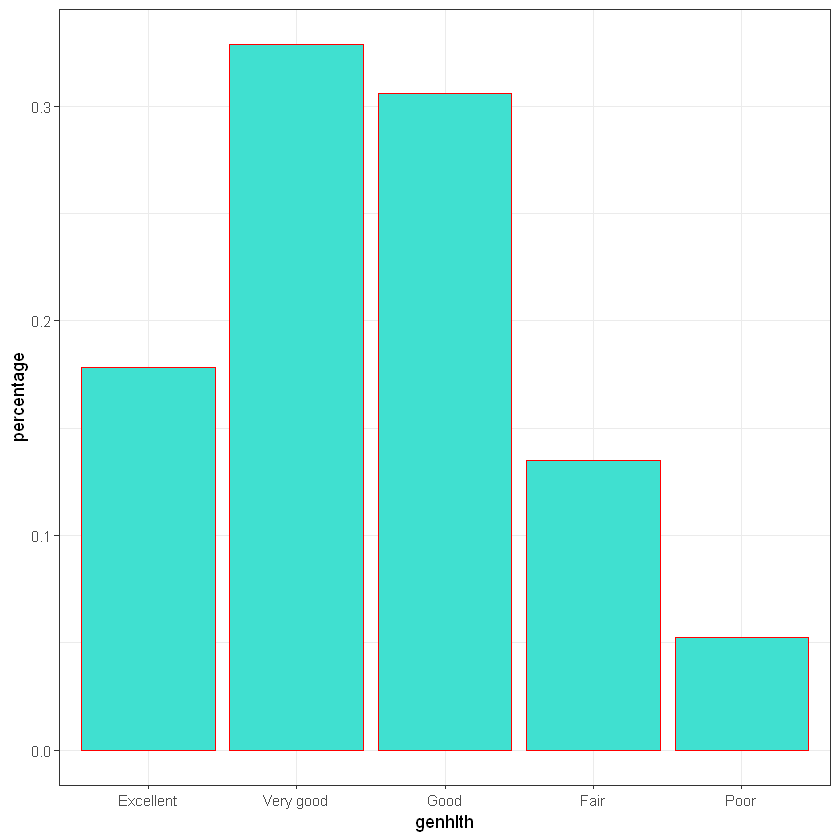

In [11]:
genhlth_bar <- hlth %>% group_by(genhlth) %>% summarise(counts=n()) %>% mutate(percentage=counts/sum(counts)) %>% ungroup()
ggplot(data=genhlth_bar,aes(x=genhlth,y=percentage))+geom_bar(stat='identity',fill='turquoise',color='red')+theme_bw()



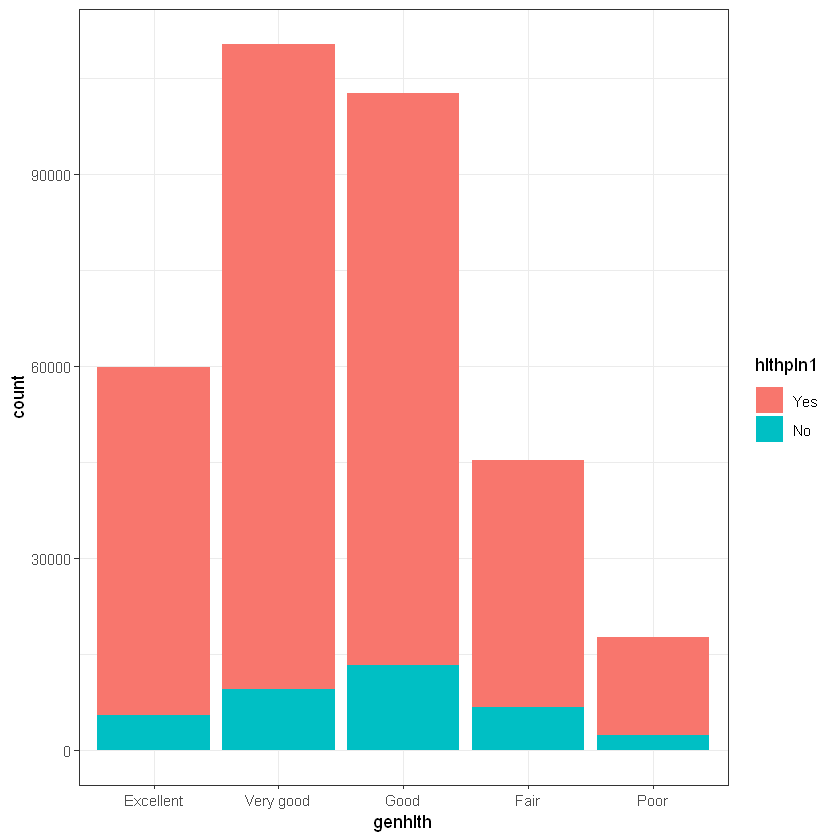

In [12]:
# EDA with three combined variables

ggplot(data=hlth,aes(x=genhlth,fill=hlthpln1))+geom_bar()+theme_bw()


# Research Question 3 :

In [ ]:
smoker <- brfss %>% select(smoke100,cvdinfr4,educa)



smoker <- smoker %>% filter(!is.na(smoke100),!is.na(cvdinfr4),!is.na(educa)) %>% rename(smokes=smoke100,Heart_attack=cvdinfr4,Education=educa)

smoker <- smoker %>% mutate(smokes=as.factor(smokes),Heart_attack=as.factor(Heart_attack),Education=as.factor(Education))

smoker <- smoker %>% mutate(Education = str_extract(Education,"^(.*"))

smoker